<a href="https://colab.research.google.com/github/rajskar/um_P710/blob/main/LinearRegression/LR_HigherOrder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Calculated Coefficients for Order 2:
  MSE Model:
    beta_0: 3.9665
    beta_1: 2.3645
    beta_2: 2.4118

  MAE Model:
    beta_0: 3.0656
    beta_1: 2.3791
    beta_2: 2.7544


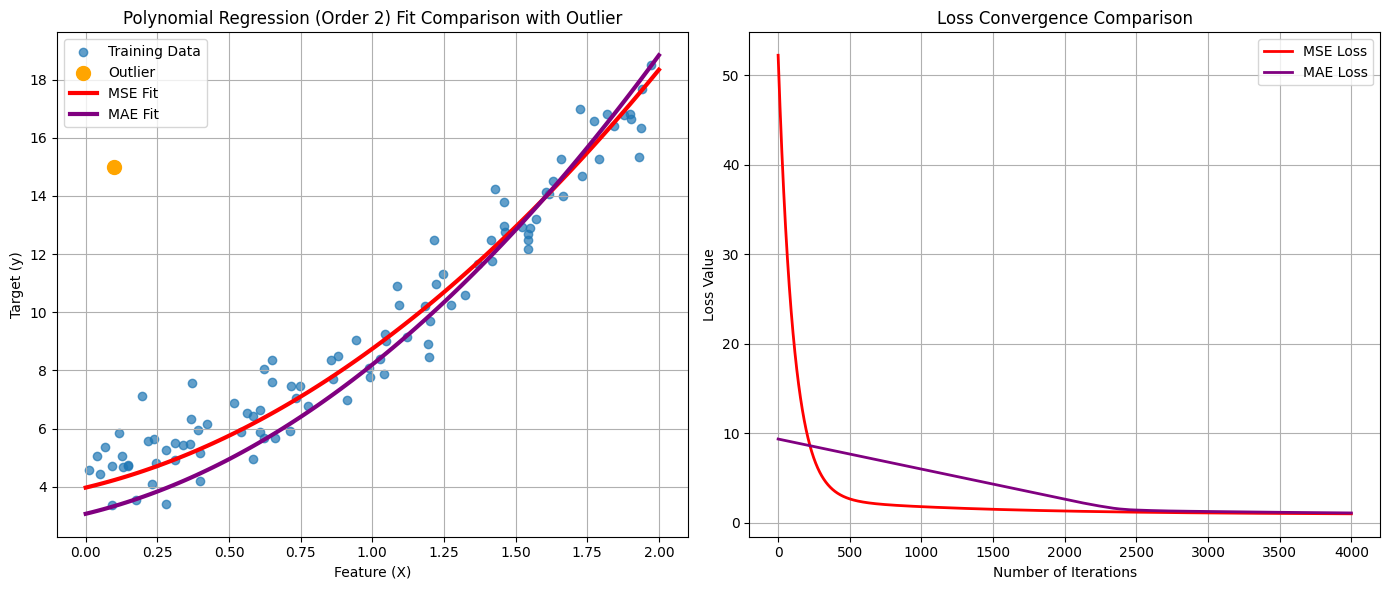

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# --- Helper function to create polynomial features ---
def create_polynomial_features(X, order):
    """
    Generates a polynomial feature matrix from a 1D feature vector.

    For an order 'n', the output matrix will have columns: [X, X^2, ..., X^n].

    Args:
        X (np.array): The feature vector of shape (m, 1).
        order (int): The degree of the polynomial.

    Returns:
        np.array: The transformed feature matrix of shape (m, order).
    """
    if order < 1:
        return X

    X_poly = np.copy(X)
    for i in range(2, order + 1):
        X_poly = np.c_[X_poly, X ** i]

    return X_poly

# --- Function to solve with Gradient Descent using Mean Squared Error (MSE) ---
def gradient_descent_mse_solve(X, y, learning_rate=0.001, n_iterations=4000):
    """
    Calculates the coefficients for a linear regression model
    using Gradient Descent to minimize the Mean Squared Error (MSE).
    """
    m = X.shape[0]
    # Add a column of ones for the intercept term
    X_b = np.c_[np.ones((m, 1)), X]
    beta = np.zeros((X_b.shape[1], 1))
    mse_history = []

    for iteration in range(n_iterations):
        y_pred = X_b @ beta
        error = y_pred - y

        # MSE Calculation
        mse = np.sum(error**2) / (2 * m)
        mse_history.append(mse)

        # MSE Gradient Calculation
        gradients = X_b.T @ error / m
        beta = beta - learning_rate * gradients

    return beta, mse_history

# --- Function to solve with Gradient Descent using Mean Absolute Error (MAE) ---
def gradient_descent_mae_solve(X, y, learning_rate=0.0005, n_iterations=4000):
    """
    Calculates the coefficients for a linear regression model
    using Gradient Descent to minimize the Mean Absolute Error (MAE).
    """
    m = X.shape[0]
    # Add a column of ones for the intercept term
    X_b = np.c_[np.ones((m, 1)), X]
    beta = np.zeros((X_b.shape[1], 1))
    mae_history = []

    for iteration in range(n_iterations):
        y_pred = X_b @ beta
        error = y_pred - y

        # MAE Calculation
        mae = np.sum(np.abs(error)) / m
        mae_history.append(mae)

        # MAE Gradient Calculation
        gradients = X_b.T @ np.sign(error) / m
        beta = beta - learning_rate * gradients

    return beta, mae_history

# --- Step 2: Generate sample data with an outlier ---
np.random.seed(42)
X_train = 2 * np.random.rand(100, 1)
y_train = 4 + 3 * X_train + 2 * X_train**2 + np.random.randn(100, 1)

# Add an outlier: a point with a low X value but a high Y value
outlier_x = np.array([[0.1]])
outlier_y = np.array([[15.0]])
X_train = np.vstack([X_train, outlier_x])
y_train = np.vstack([y_train, outlier_y])

# --- Step 3: Configure and Solve for coefficients ---
# --- Specify the polynomial order here! ---
model_order = 2

# Create polynomial features for training data
X_poly_train = create_polynomial_features(X_train, model_order)

# Solve for coefficients using both MSE and MAE
beta_mse, mse_history = gradient_descent_mse_solve(X_poly_train, y_train, learning_rate=0.001, n_iterations=4000)
beta_mae, mae_history = gradient_descent_mae_solve(X_poly_train, y_train, learning_rate=0.001, n_iterations=4000)

# Check if the solutions were successful and extract coefficients
if beta_mse is not None and beta_mae is not None:
    print(f"Calculated Coefficients for Order {model_order}:")
    print(f"  MSE Model:")
    for i, b in enumerate(beta_mse):
        print(f"    beta_{i}: {b[0]:.4f}")

    print(f"\n  MAE Model:")
    for i, b in enumerate(beta_mae):
        print(f"    beta_{i}: {b[0]:.4f}")

# --- Step 4: Visualize the results for comparison ---
X_plot = np.linspace(0, 2, 100).reshape(-1, 1)

# Create polynomial features for plotting data
X_poly_plot = create_polynomial_features(X_plot, model_order)
# Add the column of ones for the intercept to the plotting data
X_poly_plot_b = np.c_[np.ones((X_poly_plot.shape[0], 1)), X_poly_plot]

# Generate predictions using the corrected plotting data
y_pred_mse = X_poly_plot_b @ beta_mse
y_pred_mae = X_poly_plot_b @ beta_mae

plt.figure(figsize=(14, 6))

# Subplot 1: Data and Regression Lines
plt.subplot(1, 2, 1)
plt.scatter(X_train[:-1], y_train[:-1], label='Training Data', alpha=0.7)
plt.scatter(X_train[-1], y_train[-1], color='orange', s=100, label='Outlier')
plt.plot(X_plot, y_pred_mse, color='red', linewidth=3, label='MSE Fit')
plt.plot(X_plot, y_pred_mae, color='purple', linewidth=3, label='MAE Fit')
plt.title(f'Polynomial Regression (Order {model_order}) Fit Comparison with Outlier')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()
plt.grid(True)

# Subplot 2: Loss over iterations
plt.subplot(1, 2, 2)
plt.plot(range(len(mse_history)), mse_history, color='red', linewidth=2, label='MSE Loss')
plt.plot(range(len(mae_history)), mae_history, color='purple', linewidth=2, label='MAE Loss')
plt.title('Loss Convergence Comparison')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
